M. Amintoosi

# Play with Conv layers and filters

In [5]:
import keras
from keras import layers
from keras import models
import tensorflow as tf
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import requests
from io import BytesIO

keras.__version__

'2.14.0'

One Dimensional Convolution using SciPy

In [6]:
x = np.array([1, 2, 3, 4, 8])
w = np.array([1 / 3, 1 / 3, 1 / 3])
y = signal.convolve(x, w, mode="valid")
print(type(x[0]))
print(x, y)

<class 'numpy.int32'>
[1 2 3 4 8] [2. 3. 5.]


https://keras.io/api/layers/convolution_layers/convolution1d/

## For introducing with Tensors for time series, see Sec 2.2.8 of Deep Learning book, François Chollet

Timeseries data or sequence data—Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature
vectors

In [11]:
x = np.array([1, 2, 3, 4, 8])
x = tf.reshape(x, (1, 5, 1))  # reshape it to match the input shape of Conv1D
# create a model with one Conv1D layer
w = np.array([1 / 3, 1 / 3, 1 / 3])
model = models.Sequential()
model.add(
    layers.Conv1D(1, 3, input_shape=(5, 1), kernel_initializer=initializers.Constant(w))
)
print(model.weights[0].numpy())

[[[0.33333334]]

 [[0.33333334]]

 [[0.33333334]]]


In [12]:
y = model(x)  # apply the Conv1D layer to the input vector
print(y.shape, y)  # print the shape of the output tensor

(1, 3, 1) tf.Tensor(
[[[2.]
  [3.]
  [5.]]], shape=(1, 3, 1), dtype=float32)


## Applying 1D Conv. on a previous signal
I saved the 'truncated_mae_history' from chapter 4 by:

np.save("truncated_mae_history.npy", truncated_mae_history)

and then load here

151 2.24075511097908
(490,) (488,)


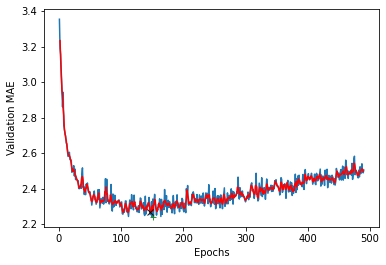

In [8]:
# x = np.load("truncated_mae_history.npy")

url = "https://raw.githubusercontent.com/fum-cs/dl-fall-2023/master/code/truncated_mae_history.npy"
response = requests.get(url) # this gets the file content as a byte stream
x = np.load(BytesIO(response.content))
w = np.array([1 / 3, 1 / 3, 1 / 3])
print(np.argmin(x), np.min(x))
model = models.Sequential()
model.add(
    layers.Conv1D(
        1, 3, input_shape=(len(x), 1), kernel_initializer=initializers.Constant(w)
    )
)

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print(x.shape, y.shape)
plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)

plt.plot(range(2, len(y) + 2), y, "r")
plt.plot(np.argmin(y) + 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [9]:
w = np.ones((1, 9)) / 9
w

array([[0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111]])

103 2.2856743


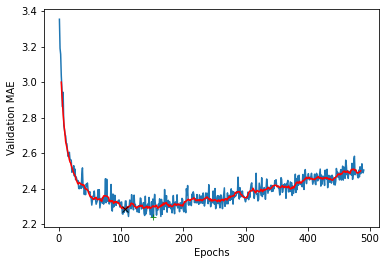

In [10]:
w = np.ones((9)) / 9
model = models.Sequential()
model.add(
    layers.Conv1D(
        1,
        w.shape[0],
        input_shape=(len(x), 1),
        kernel_initializer=initializers.Constant(w),
    )
)

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print(np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)

plt.plot(range(w.shape[0] // 2, len(y) + w.shape[0] // 2), y, "r")
plt.plot(np.argmin(y) + w.shape[0] // 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

123 2.2933633


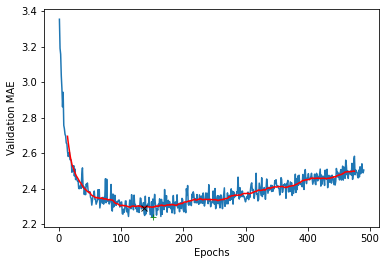

In [11]:
w = np.ones((29)) / 29
model = models.Sequential()
model.add(
    layers.Conv1D(
        1,
        w.shape[0],
        input_shape=(len(x), 1),
        kernel_initializer=initializers.Constant(w),
    )
)

X = tf.reshape(x, (1, len(x), 1))
y = model(X)
y = np.squeeze(y)
print(np.argmin(y), np.min(y))

plt.plot(range(1, len(x) + 1), x)
plt.plot(np.argmin(x) + 1, np.min(x), "g+", alpha=0.8)

plt.plot(range(w.shape[0] // 2, len(y) + w.shape[0] // 2), y, "r")
plt.plot(np.argmin(y) + w.shape[0] // 2, np.min(y), "kx", alpha=0.9)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [12]:
w.shape[0] // 2, y.shape, x.shape

(14, (462,), (490,))

In [13]:
n_channels = 1
n_filters = 1
model = models.Sequential()
model.add(layers.Conv2D(n_filters, (3, 3), input_shape=(3, 3, n_channels)))

In [14]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 1, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers[0].get_weights()[0].shape, model.layers[0].get_weights()[0]

((3, 3, 1, 1),
 array([[[[ 0.04248655]],
 
         [[-0.5599344 ]],
 
         [[ 0.20875108]]],
 
 
        [[[ 0.5428939 ]],
 
         [[-0.02432293]],
 
         [[-0.16017598]]],
 
 
        [[[-0.4182956 ]],
 
         [[-0.09414834]],
 
         [[-0.01861441]]]], dtype=float32))

The difference between model.weights and model.layers[i].get_weights() in TF is that model.weights returns a list of all the weights and biases of the model, while model.layers[i].get_weights() returns a list of the weights and biases of the i-th layer of the model.

In [16]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.04248655]],
 
         [[-0.5599344 ]],
 
         [[ 0.20875108]]],
 
 
        [[[ 0.5428939 ]],
 
         [[-0.02432293]],
 
         [[-0.16017598]]],
 
 
        [[[-0.4182956 ]],
 
         [[-0.09414834]],
 
         [[-0.01861441]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [17]:
input = np.random.randint(0, 10, size=(3, 3, n_channels))
input.shape, input, input[:, :, 0]

((3, 3, 1),
 array([[[9],
         [6],
         [7]],
 
        [[5],
         [6],
         [0]],
 
        [[5],
         [2],
         [4]]]),
 array([[9, 6, 7],
        [5, 6, 0],
        [5, 2, 4]]))

In [18]:
# model.predict(input)

In [19]:
x = input[np.newaxis, :, :, :]
x.shape

(1, 3, 3, 1)

In [20]:
model.predict(x)

1/1 [==============================] - 0s 333ms/step


array([[[[-1.30167]]]], dtype=float32)

In [21]:
w = model.weights[0]
w.shape

TensorShape([3, 3, 1, 1])

In [22]:
w = np.squeeze(w, axis=(2, 3))
w.shape, w

((3, 3),
 array([[ 0.04248655, -0.5599344 ,  0.20875108],
        [ 0.5428939 , -0.02432293, -0.16017598],
        [-0.4182956 , -0.09414834, -0.01861441]], dtype=float32))

In [23]:
np.sum(input[:, :, 0] * w)

-1.3016701638698578

تغییر تعداد کانال‌های رنگ ورودی

In [24]:
n_channels = 2
n_filters = 1
model = models.Sequential()
model.add(layers.Conv2D(n_filters, (3, 3), input_shape=(3, 3, n_channels)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 1, 1)           19        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
input = np.random.randint(0, 10, size=(3, 3, n_channels))
input.shape, input[:, :, 0]

((3, 3, 2),
 array([[7, 4, 7],
        [5, 0, 9],
        [4, 2, 6]]))

In [26]:
x = input[np.newaxis, :, :, :]
# x.shape
# model(x)
model.predict(x)

1/1 [==============================] - 0s 114ms/step


array([[[[1.4145342]]]], dtype=float32)

In [27]:
w = model.weights[0]
w.shape

TensorShape([3, 3, 2, 1])

In [28]:
w = np.squeeze(w)
w.shape, w

((3, 3, 2),
 array([[[ 0.08682957, -0.32242182],
         [-0.4332959 ,  0.42666253],
         [-0.11214086,  0.0743387 ]],
 
        [[-0.1742453 ,  0.18861839],
         [-0.46202117,  0.43769178],
         [ 0.31819722,  0.07816395]],
 
        [[ 0.4454089 , -0.39000648],
         [-0.19030392,  0.25289962],
         [-0.3255008 , -0.413692  ]]], dtype=float32))

In [29]:
np.sum(input * w)

1.4145340025424957